<h1><font color=”blue”>Training YOLOv3 using custom dataset**, single class training (CAMERA LENS)</font></h1>

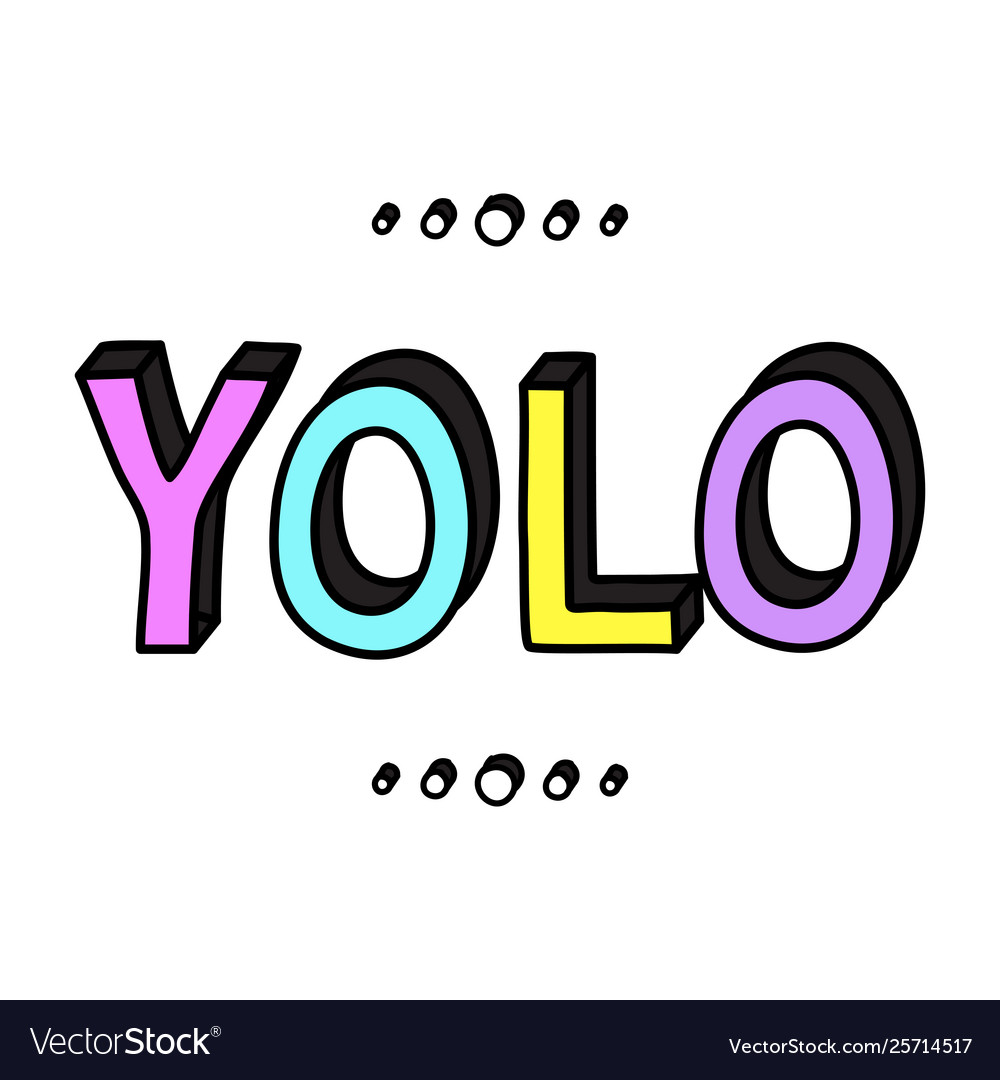

This example has 4 parts-

1.   Creating and transforming custom data to yolo format
2.   Prepairing training configuration files
3.   Training in google calab
4.    Downloading the weights from step 3 to local system and perform predictions.



<h1>Step 1 --> Creating and labelling our data set in yolo format.</h1>

<h1><font color=”blue”>We are using only single class of CAMERA LENS to train our model.Please refer to youtube video</font></h1>

<h1>Step 2 --> Prepairing training configuration files</h1>

we are using git hub code from  **Valentyn Sichkar**

clone the below repository in google colab. This will be saved under "**content**" folder

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

print current working directory to check the folder structure. Once the repo is cloned, we will see darknet folder under content

In [ ]:
import os
print(os.getcwd())

change directory to /content/darknet

In [ ]:
os.chdir("/content/darknet")

In [ ]:
print(os.getcwd())

Repostory cloned from git hub will have below folder structure-

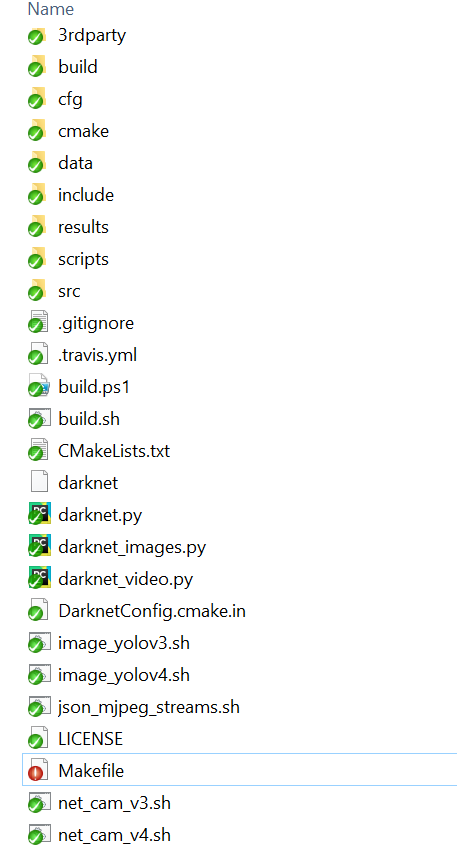

As we know that yolo uses darknet framework which is written on c, so we have to compile the binary files to create executable file that is "darknet.exe"

Repository which we have cloned has everything available and we can directly execute/compile the binary files using **make** function. However "**Makefile**" available with the original repository is configured to use "**CPU**" but we want our code to be executed using "**GPU**". So we have to update the first line of "Makefile" to GPU=1, so that the generated executable file will use "GPU"

please change the first line of "Makefile" as below

**search for GPU and update the value to 1 (GPU=1) .originally it will be 0**



upload the new "Makefile" to darknet folder. All folder structures are available on the left side. Watch my youtube video for more clarity.

Once new "**Makefile**" is available in colab, compile the code using below option

In [ ]:
#before compiling, update Makefile--> GPU=1
!make

**Below step is to verify is darknet was installed and compiled successfully in server.**

In [ ]:
#verying the darknet installation

!./darknet 

We require pretrained weights from yolo since we are using transfer learning. For this purpose, create a new folder  named "**weights**" using below command. Please note that you are under "/content/darknet" folder. So the new folder will get created under darknet folder. you can verify this from folder structure on the left.

In [ ]:
#manually creating weights folder
os.mkdir("weights") # creating directory
os.chdir("weights") # switching current path to weights folder

Now we are downloading the pretrained weights to our **weights** folder under /content/darknet/ directory

In [ ]:
#downloading the darknet weights to weights folder in colab drive
!wget https://pjreddie.com/media/files/darknet53.conv.74

once downloaded, change the directory to darknet folder

In [ ]:
os.chdir("/content/darknet")

In [ ]:
print(os.getcwd()) # verify current path

In [ ]:
# os.listdir('/usr/local/cuda-10.0/bin') # ignore this

for training darknet, we require below configuration files-


1.   custom_data.dat (contains details about other required files. This is more like a metadata file)
2.   train.cfg (contains image names with path)
3.   dataset in yolo format (contains image and yolo format text files.)
4.   backup folder to save weights. (should already be available with github repo. if not create it manually)
5.   classes.names (contains class names such as cat, dog, car)
6.   classes.txt (i believe this is optional)

**my youtube video contains step by step description for creating above requiments**. Kindly refer


<h1><font color=red>Step 3-->Once we have our setup ready, execute the darknet code</font></h1>

In [ ]:
!./darknet detector train cfg/custom_data.data cfg/yolov3_cameralens_train.cfg weights/darknet53.conv.74

** 1975** : 0.217516, 0.189443 avg loss, 0.000010 rate, 4.980024 seconds, 63200 images, 0.131800 hours left
Loaded: 0.000067 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000016, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000034, iou_loss = 0.000000, total_loss = 0.000034 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.872716, GIOU: 0.870303), Class: 0.996555, Obj: 0.917947, No Obj: 0.000402, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.034768, iou_loss = 0.050792, total_loss = 0.085560 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000008, iou_loss = 0.000000, total_loss = 0.000008 
 total_bbox = 88451, rewritten_bbox = 1.121525 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000010, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.726120, GIOU: 0.724488), Class: 0.999532, Obj: 0.716828, No Obj: 0.000355, .5R: 1.000000, .75R: 0.500000, count: 2, class_loss = 0.354581, iou_loss = 0.155282, total_loss = 0.509863 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000021, iou_loss = 0.000000, total_loss = 0.000021 
 total_bbox = 88453, rewritten_bbox = 1.121500 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000187, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.032848, iou_loss = 0.000000, total_loss = 0.032848 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.653865, GIOU: 0.614794), Class: 0.999408, Obj: 0.520928, No Obj: 0.000252, .5R: 1.000000, .75R: 0.500000, count: 2, class_loss = 0.341020, iou_loss = 0.418743, total_loss = 0.759763 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000028, iou_loss = 0.000000, total_loss = 0.000028 
 total_bbox = 88455, rewritten_bbox = 1.121474 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000173, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.005414, iou_loss = 0.000000, total_loss = 0.005414 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.879046, GIOU: 0.877997), Class: 0.998882, Obj: 0.768642, No Obj: 0.000558, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.147677, iou_loss = 0.345729, total_loss = 0.493405 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
 total_bbox = 88458, rewritten_bbox = 1.121436 % 

we have configured our yolov3_cameralens_test.cfg to have 2000 iterations or batches. so if you are using colab GPU, complete training process for 1 class training should take 2-3 hours. I had only 40 images of single class that is "**camera lens**" so took close to 2.5 hours with GPU. Please do not train your code with CPU. It will take ages.

# incase you are getting folder not exists error or file not found error. Use below code to verify.


In [ ]:
f = open("your-data/train.txt", "r") 
print(f.read())

# **your-data** folder was manually created and all image data with yolo text files were uploaded manually to colab

# **After training for 2000 epochs, our final weights were saved under weights folder**




**note: You can reduce the number of epochs**

now once you have your new weights available, download the weights to your local system and use for inferencing.


Step 4--> Visit my older video https://www.youtube.com/watch?v=ZuECLg8XE40&t=3s to see how we can use yolo model to predict new trained objects. 
Git hub link -- > https://github.com/Abhi-T/YOLO/tree/master/YOLO-3-Using_Open_CV

**Testing**

<h1><font color=red> we have successfully trained out model on camera lens dataset. Accuracy might be a bit low since i have used only 40 images. </font></h1>

**Sample Image**

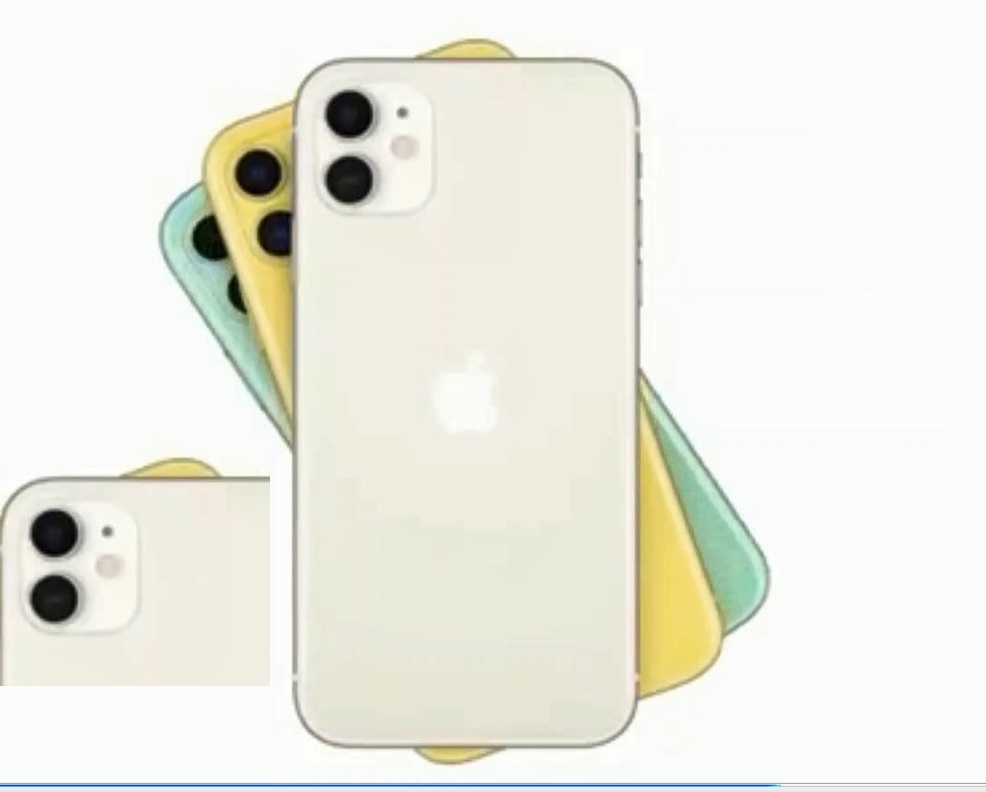

**after yolo object detection**

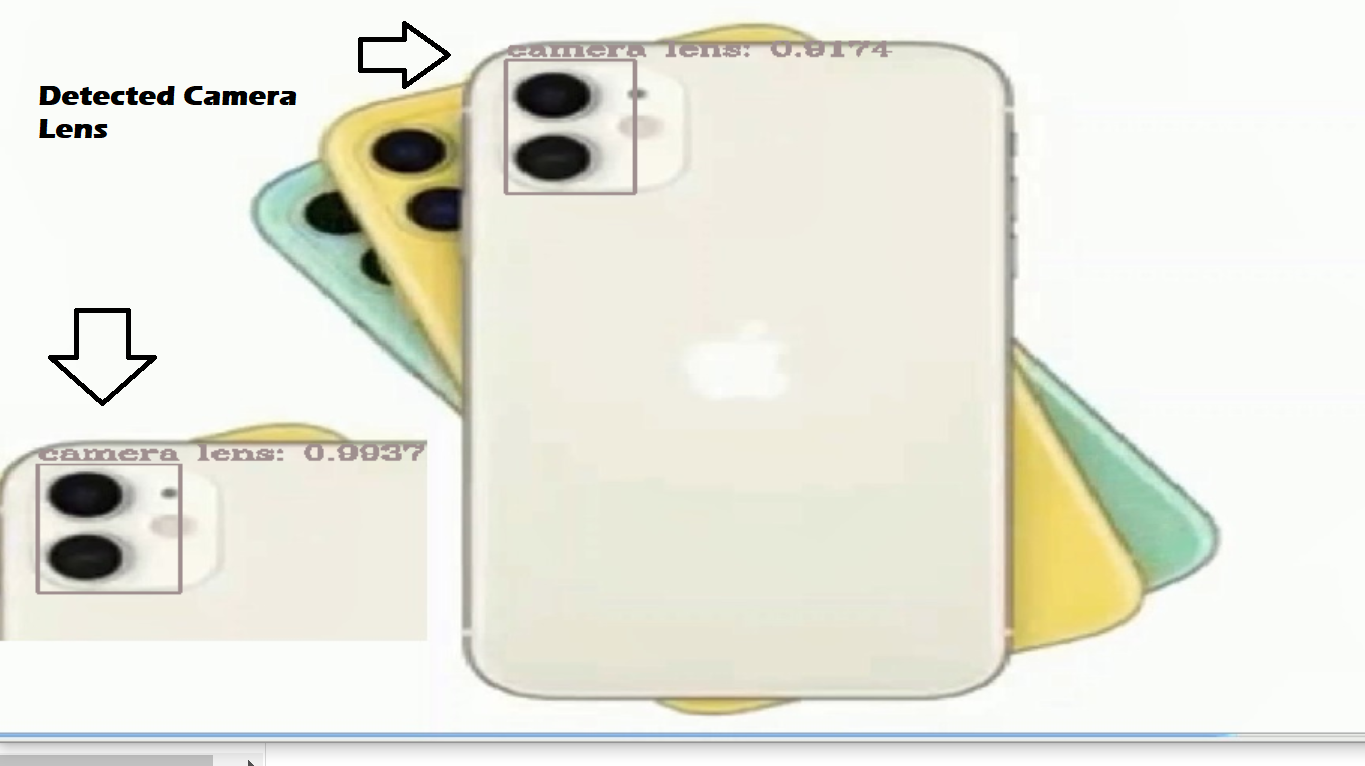

**Below is one additional step to test your model. I didnt use but sharing the command**

In [ ]:
!./darknet detector test /kaggle/input/your-data/custom_data.data /kaggle/input/your-data/test.cfg weights/yolov3_cameralens_train_final.weights test-iphone1.jpg


<h3><font color=red>TIPS--></font></h3>

1.   Download the weights to your local system as soon as the training is completed in colab. Else all the data will be removed once the notebook is refreshed. 
2.   Incase of any file missing issues, validate the path by opening the file and printing it.
3.    In my youtube video, i will cover all the missing pieces which are not covered in this video. Kindly comment or message it anything is missed.

